## Selective Search를 이용한 Region Proposal

(512, 512, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

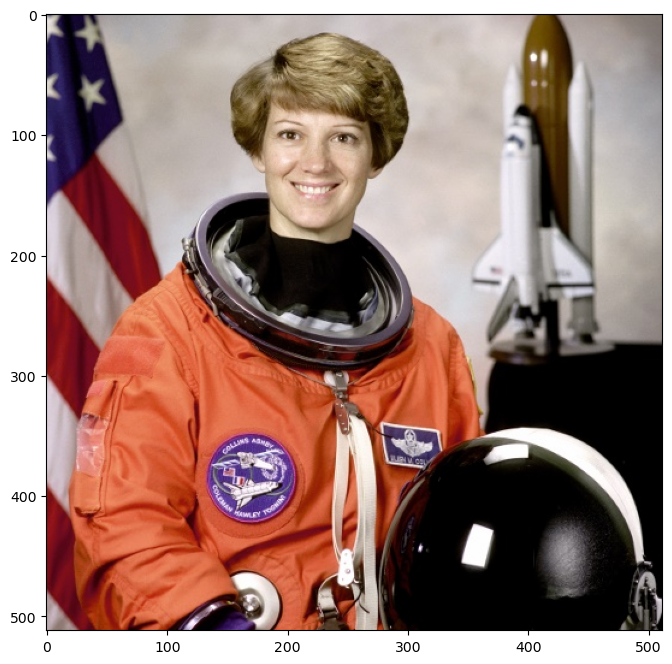

In [10]:
#! pip install opencv-python
import cv2
import matplotlib.pyplot as plt

### 이미지를 cv2로 로드하고 matplotlib으로 시각화

img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show

In [14]:
# 캐니 에지검출: Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) 
# https://engineer-mole.tistory.com/243
img = cv2.imread('image.jpg')  # 5125123,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
edges = cv2.Canny(gray_img,150,250,1) # min,max,aperture_size(=kernel_size)  ,  aperture:구멍
                                       # threshold1, threshold2 가 작을수록 더 조밀하게 검출한다
cv2.imshow("canny_image", edges) 

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
# 윤곽선 검출 : findContours(), drawContours()
# https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour
# 컨투어(contour)는 등고선을 의미
# 등고선은 지형의 높이가 같은 영역을 하나의 선으로 표시한 것
# 영상에서 컨투어를 그리면 모양을 쉽게 인식할 수 있다
img = cv2.imread('image.jpg')  # 5125123,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_image = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh_image[1],cv2.RETR_TREE,\
                                       cv2.CHAIN_APPROX_SIMPLE )

cv2.drawContours(img,contours,-1,(255,0,0),2) # (B,G,R):윤곽선색상 ,  2: thickness
cv2.imshow("contour_image",img) 

cv2.waitKey()
cv2.destroyAllWindows()

#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
size는 Bounding box의 크기
labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐.

In [24]:
# !pip install selectivesearch
import selectivesearch
_,regions =selectivesearch.selective_search(img_rgb,scale=100, min_size=2000)
print(type(regions),len(regions))

# plt.imshow(_)
# plt.show()

<class 'list'> 58


In [25]:
#rect만 추출
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 63, 154), (26, 0, 217, 226), (228, 0, 181, 350), (389, 0, 46, 184), (419, 0, 92, 283), (192, 16, 99, 56), (154, 23, 112, 157), (234, 45, 65, 84), (357, 85, 46, 186), (392, 85, 63, 163), (186, 87, 106, 102), (0, 113, 94, 124), (0, 148, 77, 125), (133, 154, 162, 110), (113, 155, 273, 209), (57, 203, 87, 128), (0, 219, 59, 126), (365, 231, 146, 253), (107, 248, 194, 187), (36, 254, 91, 121), (0, 303, 125, 156), (350, 322, 145, 133), (27, 329, 98, 90), (239, 334, 35, 177), (263, 336, 248, 175), (280, 345, 202, 139), (116, 368, 96, 88), (0, 394, 90, 117), (155, 423, 104, 88), (43, 426, 192, 85), (27, 254, 100, 165), (116, 368, 143, 143), (0, 254, 127, 205), (154, 23, 138, 166), (107, 248, 194, 263), (154, 16, 138, 173), (0, 203, 144, 256), (107, 248, 194, 263), (43, 248, 258, 263), (0, 113, 94, 232), (357, 85, 98, 186), (0, 203, 301, 308), (263, 336, 248, 175), (263, 231, 248, 280), (113, 85, 342, 279), (0, 0, 243, 273), (154, 16, 145, 173), (0, 0, 299, 273), (0, 0, 301, 511), (113,

### Bounding box를 시각화

In [ ]:
# rect:(x,y,width,height)
green_rgh = (125,255,51)
img_rgb_gocp = img_rgb.copy() # 이미지 사본을 생성

for rect in cand_rects:
    left = rect[0] # x1
    top = rect [1] # y1
